In [1]:
import numpy as np
import matplotlib.pyplot as plt

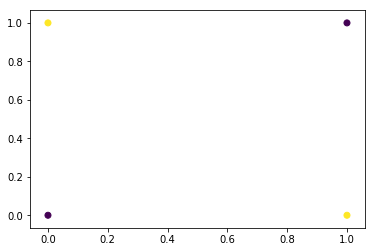

2.9192734651561936
2.878765670098224
2.8395991525921462
2.8017356284170623
2.765136345696515
2.7297622564287494
2.695574180190114
2.662532958517396
2.630599598832723
2.599735407104438
2.5699021087351364
2.541061957431879
2.5131778320423575
2.4862133215347555
2.460132798459424
2.4349014813592227
2.410485486694844
2.3868518709245996
2.3639686634279125
2.3418048909912255
2.3203305945872703
2.299516839176352
2.2793357172443596
2.2597603467688647
2.240764864274191
2.2223244136005706
2.204415130973187
2.1870141269152743
2.1700994655068704
2.1536501414480496
2.137646055343451
2.1220679875840758
2.1068975711632736
2.0921172637267587
2.0777103191217203
2.0636607586776665
2.0499533424216767
2.036573540403249
2.0235075042787907
2.0107420392830813
1.9982645766944636
1.9860631468821504
1.974126353007565
1.9624433454370873
1.9510037969106897
1.9397978784996548
1.9288162363767016
1.9180499694132789
1.9074906076113962
1.897130091371059
Final weight: [-0.21037724 -2.14606815  0.4509062   1.02687267]
Fi

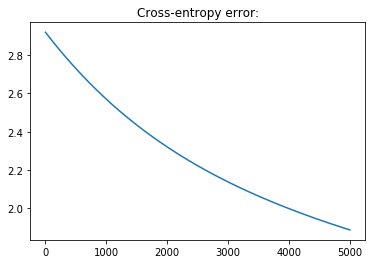

In [2]:
N = 4
D = 2

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([0, 1, 1, 0])

ones = np.array([[1]*N]).T

plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

xy = np.matrix(X[:,0] * X[:,1]).T
Xb = np.array(np.concatenate((ones, xy, X), axis=1))

w = np.random.randn(D + 2)
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

learning_rate = 0.001
error = []
for i in range(5000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i%100 == 0:
        print(e)
        
    w += learning_rate*((T - Y).T.dot(Xb) - 0.01*w)
    Y = sigmoid(Xb.dot(w))
    
plt.plot(error)
plt.title('Cross-entropy error:')
print('Final weight:', w)
print('Final classification rate:', 1 - np.abs(T - np.round(Y)).sum() / N)